In [1]:
import sys
sys.path.append('c:\\Users\\Admin\\few_shot_learning\\')

from Utils.Class import Predictor, FSL, Random, Nearest_Neighbour
from Utils.saveLoad import save_data, load_data
from Utils import preprocess, testModels, buildModel, utils

import numpy as np
import os
import random

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
kwargs = {'X_train' : True,
          'Y_train' : True}
data = load_data(path="D://", **kwargs)

X_train loaded from /D://X_train.h5!
Y_train loaded from /D://Y_train.h5!


In [3]:
# split the dataset into training and testing -> 20/30 of the classes will be used for training, 5 for validation and 5 for testing
with open(r'data\airplane\fgvc-aircraft-2013b\data\util\military_families.txt', 'r') as f:
    train_imgs_dir = {}
    test_imgs_dir = {}
    val_imgs_dir = {}

    NUM_TRAIN = 20
    NUM_VAL = 25
    count = 0
    for line in f.readlines():
        if count < NUM_TRAIN:
            train_imgs_dir.update({line.strip() : []})
        elif count < NUM_VAL:
            val_imgs_dir.update({line.strip() : []})
        else:
            test_imgs_dir.update({line.strip() : []})
        count += 1

print(train_imgs_dir.keys())
print(val_imgs_dir.keys())
print(test_imgs_dir.keys())

dict_keys(['Saab 2000', 'Il-76', 'DC-9', 'DH-82', 'King Air', 'Hawk T1', 'Tornado', 'BAE-125', 'DHC-6', 'Tu-154', 'Beechcraft 1900', 'DC-3', 'An-12', 'PA-28', 'EMB-120', 'ATR-72', 'Spitfire', 'C-47', 'Tu-134', 'Dornier 328'])
dict_keys(['Cessna 208', 'ATR-42', 'F/A-18', 'C-130', 'Embraer ERJ 145'])
dict_keys(['Cessna 172', 'Eurofighter Typhoon', 'F-16', 'Challenger 600', 'DHC-1'])


In [4]:
with open(r'data\airplane\fgvc-aircraft-2013b\data\util\images_family_train.txt', 'r') as f:
    for line in f.readlines():
        img_fn = r'data\airplane\fgvc-aircraft-2013b\data\images\{}.jpg'.format(line[:7])
        model = line[8:].strip()
        
        if model in train_imgs_dir:
            train_imgs_dir[model].append(img_fn)

        elif model in val_imgs_dir:
            val_imgs_dir[model].append(img_fn)

        elif model in test_imgs_dir:
            test_imgs_dir[model].append(img_fn)

with open(r'data\airplane\fgvc-aircraft-2013b\data\util\images_family_test.txt', 'r') as f:
    for line in f.readlines():
        img_fn = r'data\airplane\fgvc-aircraft-2013b\data\images\{}.jpg'.format(line[:7])
        model = line[8:].strip()
        
        if model in train_imgs_dir:
            train_imgs_dir[model].append(img_fn)

        elif model in val_imgs_dir:
            val_imgs_dir[model].append(img_fn)


        elif model in test_imgs_dir:
            test_imgs_dir[model].append(img_fn)


with open(r'data\airplane\fgvc-aircraft-2013b\data\util\images_family_val.txt', 'r') as f:
    for line in f.readlines():
        img_fn = r'data\airplane\fgvc-aircraft-2013b\data\images\{}.jpg'.format(line[:7])
        model = line[8:].strip()
        
        if model in train_imgs_dir:
            train_imgs_dir[model].append(img_fn)

        elif model in val_imgs_dir:
            val_imgs_dir[model].append(img_fn)

        elif model in test_imgs_dir:
            test_imgs_dir[model].append(img_fn)

In [5]:
print('model num_samples')
for k in train_imgs_dir.keys():
    print(k, len(train_imgs_dir[k]))

print('\nmodel num samples')
val_imgs_dir['Embraer ERJ 145'] = np.random.choice(val_imgs_dir['Embraer ERJ 145'], 100).tolist()
for k in val_imgs_dir.keys():
    print(k, len(val_imgs_dir[k]))

print('\nmodel num samples')
for k in test_imgs_dir.keys():
    print(k, len(test_imgs_dir[k]))

model num_samples
Saab 2000 100
Il-76 100
DC-9 100
DH-82 100
King Air 100
Hawk T1 100
Tornado 100
BAE-125 100
DHC-6 100
Tu-154 100
Beechcraft 1900 100
DC-3 100
An-12 100
PA-28 100
EMB-120 100
ATR-72 100
Spitfire 100
C-47 100
Tu-134 100
Dornier 328 100

model num samples
Cessna 208 100
ATR-42 100
F/A-18 100
C-130 100
Embraer ERJ 145 100

model num samples
Cessna 172 100
Eurofighter Typhoon 100
F-16 100
Challenger 600 100
DHC-1 100


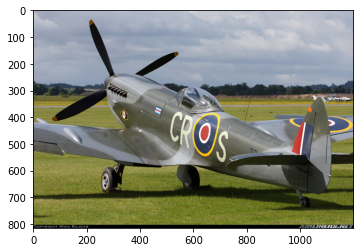

In [6]:
img = plt.imread(train_imgs_dir['Spitfire'][0])
plt.imshow(img)

180 280 200


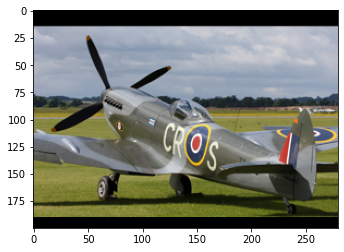

In [8]:
#crop bottom banner of 20px
img = img[:-20, :]
img = preprocess.pad_and_resize(img, desired_ratio=1.4, width=280, height=200)
plt.imshow(img)


In [6]:
X_train, Y_train = preprocess.get_all_X_Y(train_imgs_dir, desired_ratio=1.4, width=280, height=200)

(2, 200, 280, 3) 2
(202, 200, 280, 3) 202
(402, 200, 280, 3) 402
(602, 200, 280, 3) 602
(802, 200, 280, 3) 802
(1002, 200, 280, 3) 1002
(1202, 200, 280, 3) 1202
(1402, 200, 280, 3) 1402
(1602, 200, 280, 3) 1602
(1802, 200, 280, 3) 1802


In [15]:
X_val, Y_val = preprocess.get_all_X_Y(val_imgs_dir, desired_ratio=1.4, width=280, height=200)

(2, 200, 280, 3) 2
(202, 200, 280, 3) 202
(402, 200, 280, 3) 402


In [8]:
X_test, Y_test = preprocess.get_all_X_Y(test_imgs_dir, desired_ratio=1.4, width=280, height=200)

(2, 200, 280, 3) 2
(202, 200, 280, 3) 202
(402, 200, 280, 3) 402


In [16]:
save_data(path='D://', X_train=X_train, Y_train=Y_train)
save_data(path='D://', X_val=X_val, Y_val=Y_val)
save_data(path='D://', X_test=X_test, Y_test=Y_test)

saving data...
saved X_val to /D://X_val.h5!
saved Y_val to /D://Y_val.h5!


In [11]:
pos_pairs, pos_labels, pos_raw_labels = preprocess.make_positive_pairs(data['X_train'], data['Y_train'], list(train_imgs_dir.keys()), N=30000)
print(pos_pairs.shape, pos_labels.shape, len(pos_raw_labels))

Saab 2000
Il-76
DC-9
DH-82
King Air
Hawk T1
Tornado
BAE-125
DHC-6
Tu-154
Beechcraft 1900
DC-3
An-12
PA-28
EMB-120
ATR-72
Spitfire
C-47
Tu-134
Dornier 328
(30000, 2, 200, 280, 3) (30000,) 30000


In [12]:
neg_pairs, neg_labels, neg_raw_labels = preprocess.make_negative_pairs(data['X_train'], data['Y_train'], N=30000)
print(neg_pairs.shape, neg_labels.shape, len(neg_raw_labels))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
(30000, 2, 200, 280, 3) (30000,) 30000


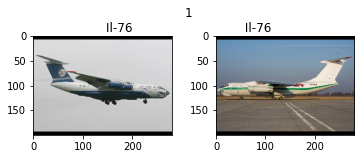

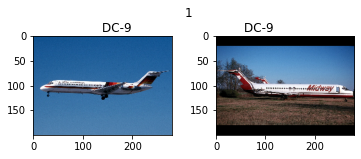

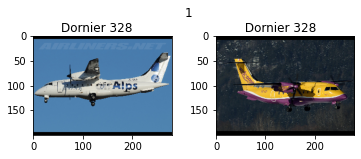

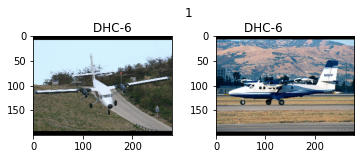

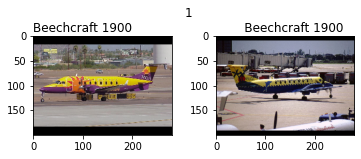

In [13]:
utils.show_pairs(5, pos_pairs, pos_labels, pos_raw_labels, random=False)

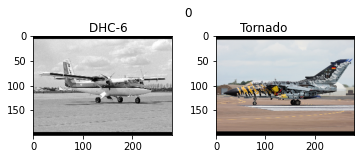

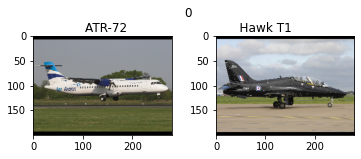

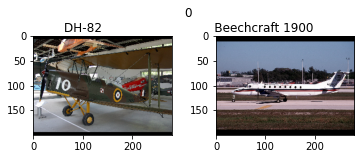

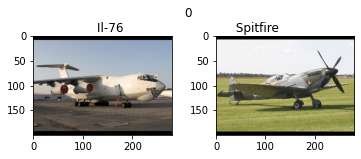

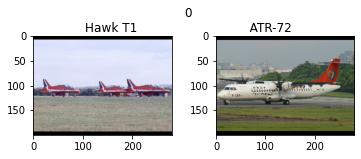

In [14]:
utils.show_pairs(5, neg_pairs, neg_labels, neg_raw_labels, random=False)

In [11]:
val_pairs = np.vstack((pos_pairs, neg_pairs))

val_labels = np.append(pos_labels, neg_labels)

val_raw_labels = pos_raw_labels
val_raw_labels.extend(neg_raw_labels)


print(val_pairs.shape, val_labels.shape, len(val_raw_labels))

(6000, 2, 200, 280, 3) (6000,) 6000


In [15]:
train_pairs = np.vstack((pos_pairs, neg_pairs))

train_labels = np.append(pos_labels, neg_labels)

train_raw_labels = pos_raw_labels
train_raw_labels.extend(neg_raw_labels)


print(train_pairs.shape, train_labels.shape, len(train_raw_labels))

(60000, 2, 200, 280, 3) (60000,) 60000


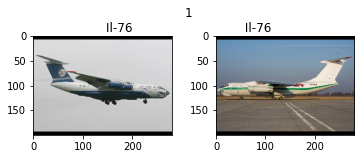

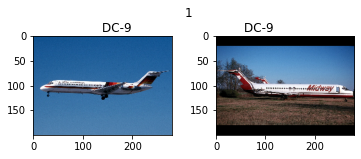

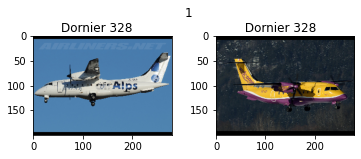

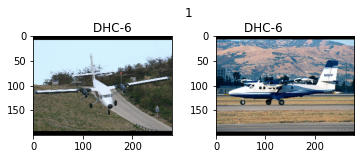

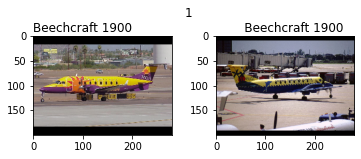

In [17]:
utils.show_pairs(5, train_pairs, train_labels, train_raw_labels, random=False)

In [19]:
val_pairs, val_labels, val_raw_labels = shuffle(val_pairs, val_labels, val_raw_labels)

In [18]:
train_pairs, train_labels, train_raw_labels = shuffle(train_pairs, train_labels, train_raw_labels)

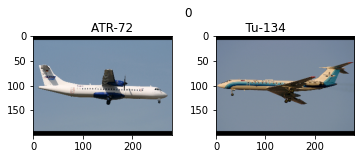

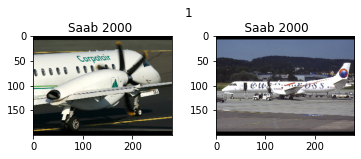

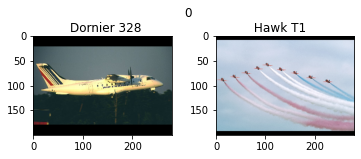

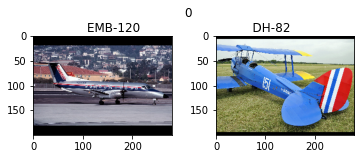

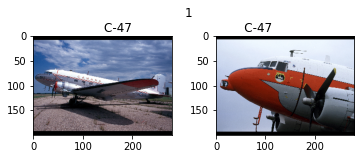

In [19]:
utils.show_pairs(5, train_pairs, train_labels, train_raw_labels, random=False)

In [20]:
save_data(path='D://', train_pairs2=train_pairs, train_labels2=train_labels, train_raw_labels2=train_raw_labels)
# save_data(path='D://', val_pairs=val_pairs, val_labels=val_labels, val_raw_labels=val_raw_labels)

saving data...
saved train_pairs2 to /D://train_pairs2.h5!
saved train_labels2 to /D://train_labels2.h5!
saved train_raw_labels2 to /D://train_raw_labels2.h5!
